# CC 303: Intro to Mythology
- Ryan Jinnette
- 12/9/2024

## Purpose of Project
As an MIS Student with a CS Certificate, I wanted to bring my coding skills and data analytics into the world of Greek Mythology and seeing what I can do. As I read the Odyssey, I couldn't help but thing about the Epic as a whole and how it might compare to others of its type. More specifically all of the translations present of the book. Our class focuses on Emily Wilson's translation however I located a few more translations and I thought what better way to compare them than with natural language processing or NLP. NLP is a technique used to parse information and make meaning out of it. NLP is used in Autocorrect, some AI models, and email systems. Calendars have also adopted NLP to automate and simplify different aspects of the Calendar process. For instance, if someone was to type "Paper Due tmr at 10pm" the Calendar app will automatically discern the time and day from "tmr at 10pm" and add it to your calendar. In my application I wanted to track Parts of Speech and Word Frequency across the different translations to see if there are any standout observations between the versions.

## Code
### Setup
- Our code is being run with Python and specifically by using a jupyter notebook which allows for markdown (normal text like this) and code to be run adjacent to it
- The following two cells are the setups and packages needed for our project and can be installed using "pip" for anybody wanting to do this at home
- This code only needs to be run once in order to properly load the models and packages needed for the duration of the project

In [1]:
import pandas as pd
import altair as alt
import nltk  # ← new
from nltk.corpus import stopwords as stop
from altair_viewer import display

# from nltk.stem import PorterStemmer as stemmer
# from nltk.stem import WordNetLemmatizer as lemmatizer
# from nltk.corpus import wordnet

from nltk import word_tokenize, pos_tag
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

nlp = spacy.load("en_core_web_sm")

In [2]:
"""call this at the beginning of a session to install dependencies"""
nltk.download("punkt")  # necessary for tokenization
nltk.download("wordnet")  # necessary for lemmatization
nltk.download("stopwords")  # necessary for removal of stop words
nltk.download("averaged_perceptron_tagger")  # necessary for POS tagging
nltk.download("maxent_ne_chunker")  # necessary for entity extraction
nltk.download("words")
nltk.download("punkt_tab")
nltk.download("averaged_perceptron_tagger_eng")
alt.data_transformers.enable("vegafusion")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ryanjinnette/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ryanjinnette/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryanjinnette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ryanjinnette/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/ryanjinnette/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/ryanjinnette/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data] 

DataTransformerRegistry.enable('vegafusion')

### Processing
- By creating functions I can repeat the code later in the project
- I need to ingest the story, split it up, count the frequency, store the data, then plot the data to complete my project
- These functions below have all of the code used for this project

In [3]:
def ingest(text_name: str) -> str:
    with open(text_name, "r") as f:
        story = f.read()
    return story

In [39]:
def define_stopwords() -> list:
    stopwords = stop.words("english")
    stopwords.extend(["chapter",'thy','thou','thus',"o'er",'Digitized by Google','th','book', 'digitized','google'])
    return stopwords

In [5]:
def tokenize(story: str, stopwords: list) -> list:
    tokens = nltk.word_tokenize(story.lower())
    words = [word for word in tokens if word.isalpha()]
    without_stopwords = [word for word in words if word not in stopwords]
    return words, without_stopwords

In [6]:
def bag_of_words(words: list[str]) -> list:
    bow = {}
    for word in words:
        bow[word] = words.count(word)
    words_frequency = sorted(bow.items(), key=lambda x: x[1], reverse=True)
    return words_frequency

In [29]:
def create_wordcloud(story: str):
    wc = WordCloud(width=500, height=500, background_color="white").generate(story)
    # display the generated image:
    my_dpi = 72
    plt.figure(figsize=(750 / my_dpi, 750 / my_dpi), dpi=my_dpi)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [8]:
def get_common_words(words_frequency: list) -> pd.DataFrame:
    # first we create a dataframe from the word frequencies
    df = pd.DataFrame(words_frequency, columns=["word", "count"])
    return df

In [9]:
def plot_top_words(df: pd.DataFrame):
    # we want to focus just on the top 20 words
    df_top = df[:50]
    df_100 = df[:100]
    # df_top_100 = df[:100] # use this later

    # draw horizontal barchart
    chart = alt.Chart(df_top).mark_bar().encode(x="count:Q", y=alt.Y("word:N", sort="-x"))
    return chart

In [10]:
def words_by_type(story: str, stopwords: list) -> str:
    # first we extract all words and their types (a.k.a. parts-of-speech or POS)
    pos = pos_tag(word_tokenize(story))

    # we will be collecting words and types in lists of the same length
    words = []
    types = []

    # iterate over all entries in the pos list (generated above)
    for p in pos:
        # get the word and turn it into lowercase
        word = p[0].lower()
        # get the word's type
        tag = p[1]

        # for this analysis we remove entries that contain punctuation or numbers
        # and we also ignore the stopwords (sorry: the, and, or, etc!)
        if word.isalpha() and word not in stopwords:
            # first we add this word to the words list
            words.append(word)
            # then we add its word type to types list, based on the 1st letter of the pos tag
            # note that we access letters in a string, like entries in a list
            if tag[0] == "J":
                types.append("Adjective")
            elif tag[0] == "N":
                types.append("Noun")
            elif tag[0] == "R":
                types.append("Adverb")
            elif tag[0] == "V":
                types.append("Verb")
            # there are many more word types, we simply subsume them under 'other'
            else:
                types.append("Other")
    return words, types

In [11]:
def plot_pos_words(df_pared: pd.DataFrame):
    # along the type column, we want to support a filter selection
    selection = alt.selection(type="multi", fields=["type"])
    
    # we create a composite chart consisting of two sub-charts
    # the base holds it together and acts as the concierge taking care of the data
    base = alt.Chart(df_pared)
    
    # this shows the types, note that we rely on Altair's aggregation prowess
    chart1 = (
        base.mark_bar()
        .encode(
            x=alt.Y("type:N"),
            y=alt.X("count()"),
            # when a bar is selected, the others are displayed with reduced opacity
            opacity=alt.condition(selection, alt.value(1), alt.value(0.25)),
        )
        .add_selection(selection)
    )
    
    # this chart reacts to the selection made in the left/above chart
    chart2 = (
        base.mark_bar(width=5)
        .encode(
            x="word:N",
            y=alt.Y("count()"),
        )
        .transform_filter(selection)
    )
    
    stacked_chart = chart1 | chart2
    return stacked_chart

In [12]:
def create_pos_dataframe(
    words: list, types: list, df_top: pd.DataFrame
) -> pd.DataFrame:
    # create a dataframe from the words and types lists
    df = pd.DataFrame({"word": words, "type": types})
    index = df["word"].isin(df_top["word"])
    df_pared = df[index].reset_index(drop=True)
    return df_pared

## Execute Code:

### Robert Fagles
- ISBN: 9780140268867

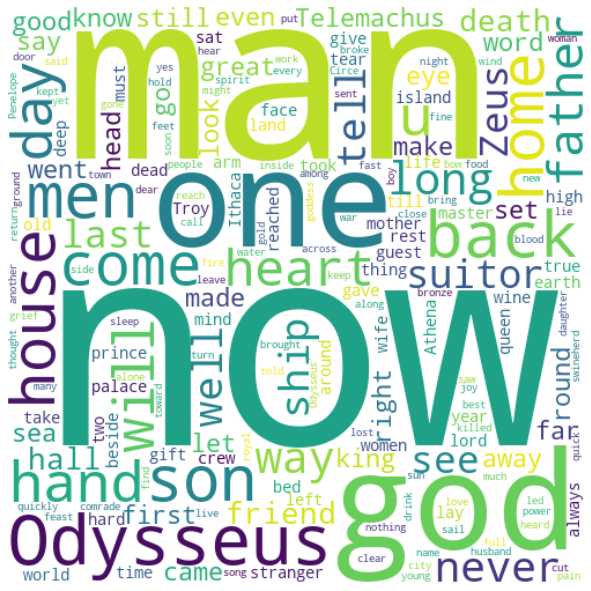

alt.Chart(...)

In [13]:
story = ingest('docs/Fagles.txt')
stopwords = define_stopwords()
words, without_stopwords = tokenize(story, stopwords)
words_frequency = bag_of_words(without_stopwords)
create_wordcloud(story)
df = get_common_words(words_frequency)
chart = plot_top_words(df)
chart

In [14]:
words, types = words_by_type(story, stopwords)
df_pared = create_pos_dataframe(words, types, df)
int_chart = plot_pos_words(df_pared)
int_chart

alt.HConcatChart(...)

#### Observations for this Translation:
- In the Robert Fagles Translation we can see that Odysseus and Man tie for first place in their frequency with around 550 instances of the word.
- One other notable aspect is the frequency of the word "home" which is likely pointed towards the idea of xenia and the importance of home life or Odysseus' journey home
- The most common verb was "let" in this translation around ~180 instances

### Emily Wilson
- ISBN:9780393356250

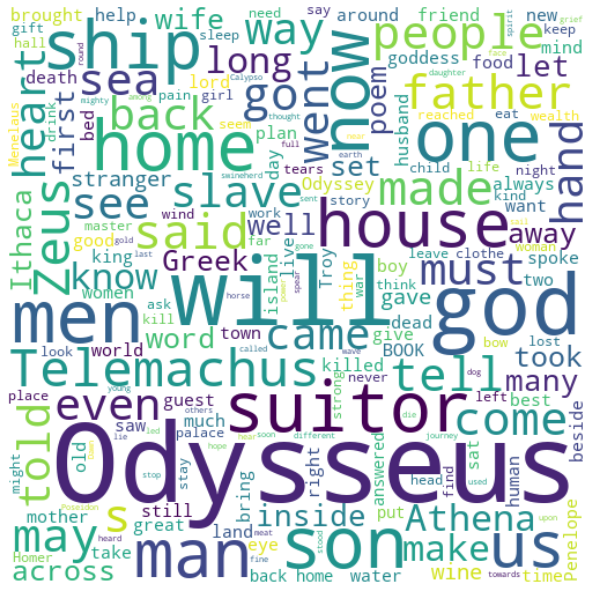

alt.Chart(...)

In [15]:
story = ingest('docs/Wilson.txt')
stopwords = define_stopwords()
words, without_stopwords = tokenize(story, stopwords)
words_frequency = bag_of_words(without_stopwords)
create_wordcloud(story)
df = get_common_words(words_frequency)
chart = plot_top_words(df)
chart

In [16]:
words, types = words_by_type(story, stopwords)
df_pared = create_pos_dataframe(words, types, df)
int_chart = plot_pos_words(df_pared)
int_chart

alt.HConcatChart(...)

#### Observations on this story
- Wilson's translation is very "Odysseus" heavy and has over 800 instances of the word "Odysseus". This is more a disproportionate spread than the other translations
- There are also over 30,000 instances of Nouns in this book as well and ~18,000 verb instances of which "said" seems to be the most popular in this version

### Alexander Pope
- ISBN: 9781490516424

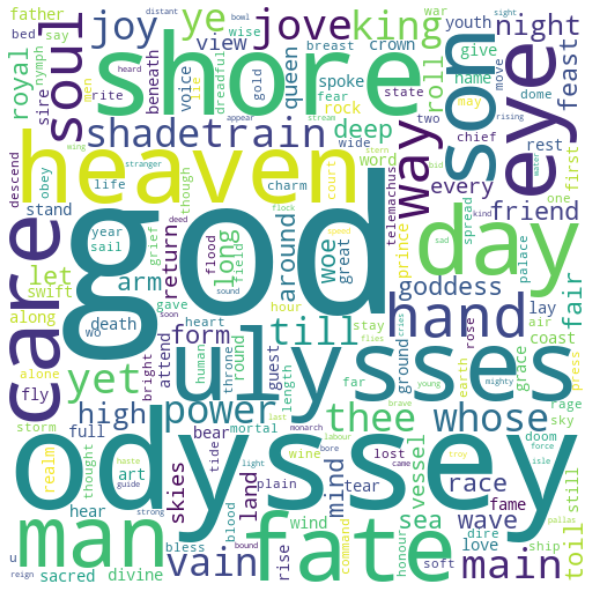

alt.Chart(...)

In [33]:
story = ingest('docs/Pope.txt')
stopwords = define_stopwords()
words, without_stopwords = tokenize(story, stopwords)
words_frequency = bag_of_words(without_stopwords)

#add this .join() to get rid of stopwords in the wordcloud
create_wordcloud(' '.join(without_stopwords))
df = get_common_words(words_frequency)
chart = plot_top_words(df)
chart

In [34]:
words, types = words_by_type(story, stopwords)
df_pared = create_pos_dataframe(words, types, df)
int_chart = plot_pos_words(df_pared)
int_chart

alt.HConcatChart(...)

#### Observations for this story
- This version translated by Alexander Pope is extremely interesting as it was written in iambic pentameter and therefore is more of a poem than a story.
- I had to remove a lot more words like "thus","thy","o'er" and more which was a unique challenge I had to code through. However once I figured it out the wordcloud became a lot clearer and more impactful
- One thing that is notable is that the top two words are "Odyssey" and "Ulysses". Odyssey likely refers to Odysseus but Ulysses is simply the Roman name for Odysseus. This is the only translation that I inspected that has this feature present.

### William Collins

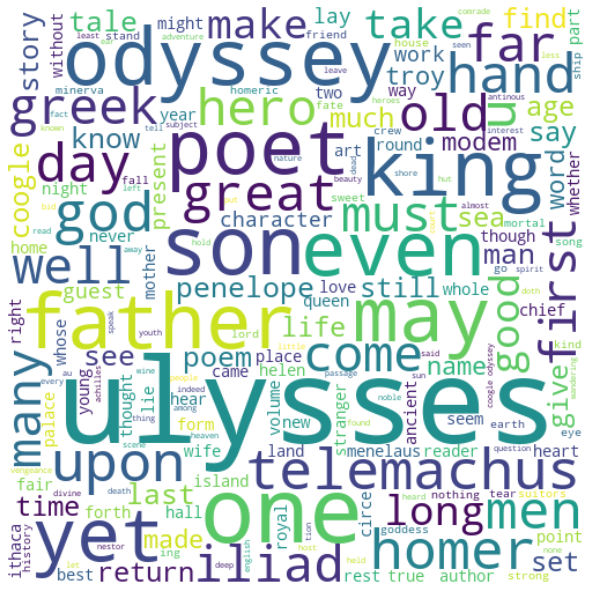

alt.Chart(...)

In [40]:
story = ingest('docs/Collins.txt')
stopwords = define_stopwords()
words, without_stopwords = tokenize(story, stopwords)
words_frequency = bag_of_words(without_stopwords)
create_wordcloud(" ".join(without_stopwords))
df = get_common_words(words_frequency)
chart = plot_top_words(df)
chart

In [41]:
words, types = words_by_type(story, stopwords)
df_pared = create_pos_dataframe(words, types, df)
int_chart = plot_pos_words(df_pared)
int_chart

alt.HConcatChart(...)

#### Observations for this story
- First off, this story seems substantially shorter from both the runtime of the code but as well as the Parts of Speech. Nouns are roughly 11,000 of the words where as in Emily Wilson's translation it was nearing 30,000.
- As with Pope's version, this version also refers to Odysseus as Ulysses as well
- The iliad is a common words with over 40 occurances in the text